In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler, RobustScaler, Normalizer, TargetEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import classification_report, f1_score, roc_curve, precision_recall_curve, confusion_matrix, log_loss, balanced_accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, accuracy_score

from tqdm import tqdm
from IPython.display import display_html
from sklearn.svm import SVR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, PolynomialFeatures, MinMaxScaler,StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, SplineTransformer
from sklearn.linear_model import LogisticRegression, BayesianRidge, Ridge, Lasso 
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer, TransformedTargetRegressor
from sklearn.metrics import mean_absolute_percentage_error, make_scorer, mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

import category_encoders as ce

from tqdm import tqdm
from scipy.stats import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import load_breast_cancer

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import openpyxl as op
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif ## тест на гетероскедастичность
from stargazer.stargazer import Stargazer, LineLocation
from stargazer.stargazer import HTMLRenderer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection  import RFE

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection  import RFE

In [79]:
df = pd.read_csv("train_house_B.csv")
df.head()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408


# Проверяем на наличие дупликатов в данных и удаляем их, ведь иначе мы можем обучаться на однйо строке, а другая попадет в тест (=утечка данных)

In [80]:
display(len(df) - len(df.drop_duplicates()))
df.drop_duplicates(inplace=True)
display(len(df) - len(df.drop_duplicates()))

0

0

In [81]:
df.columns

Index(['price', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28'],
      dtype='object')

<AxesSubplot: ylabel='Frequency'>

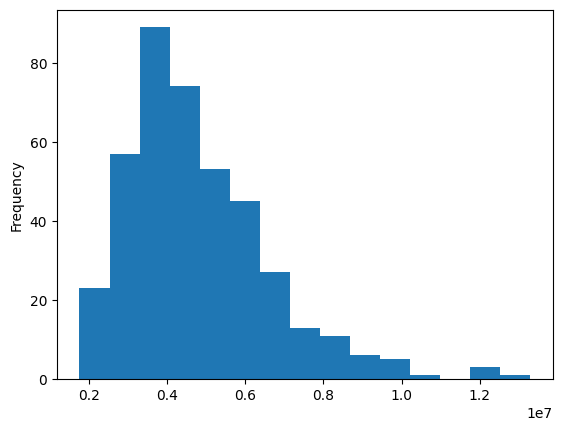

In [82]:
df['price'].plot(kind='hist', bins=15)

# Немного фичинга: идея: откдиываем фичи, которые имеют крайне малое стандарнтое отклонение (по сути данный столбец - просто const -его и удалили)

In [83]:
for column in df.drop(columns='price'):
    if df[column].std() < 0.001:
        print(column)

df.drop(columns='10', inplace=True)
df.shape

10


(408, 29)

In [84]:
X, y = df.drop(columns='price'), df['price']
X.shape

(408, 28)

<AxesSubplot: >

,price,0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
price,1.000000,-0.286478,0.077768,0.563425,0.277344,0.230032,0.123489,0.023240,-0.058357,0.044062,-0.026874,-0.043878,0.511799,0.024195,0.023643,0.171000,0.227890,0.075106,0.335347,0.329963,0.364022,0.359166,0.530927,-0.028897,0.386473,0.415463,-0.031564,0.418608,-0.112216
0,-0.286478,1.000000,-0.105334,-0.180131,-0.145444,0.000736,0.056038,0.040782,0.102345,-0.104896,0.056612,-0.055793,-0.071993,0.095986,-0.033083,-0.045459,-0.120691,-0.025142,-0.072863,-0.116691,-0.114774,-0.080717,-0.119670,0.023332,-0.162582,-0.090853,-0.017687,-0.140267,0.050581
1,0.077768,-0.105334,1.000000,0.128683,0.079707,0.057467,0.004717,0.014808,-0.044145,-0.014551,0.049353,-0.044184,0.048726,0.064644,-0.032673,-0.039317,0.035256,0.003013,0.037788,-0.016815,0.049828,0.028619,0.050157,0.038509,0.104312,-0.005453,-0.024528,0.113910,0.058156
2,0.563425,-0.180131,0.128683,1.000000,0.254300,0.260241,-0.235658,0.049358,-0.023237,-0.014880,0.037207,-0.065532,0.517711,0.006567,0.045968,0.026574,0.140172,-0.022291,0.234583,0.150639,0.243506,0.185434,0.226779,0.018653,0.361520,0.115848,-0.092757,0.212184,-0.029247
3,0.277344,-0.145444,0.079707,0.254300,1.000000,0.043530,-0.057441,-0.015792,-0.096265,-0.102720,0.050073,-0.000822,0.131529,0.054573,-0.012198,0.018281,0.082354,-0.014943,0.035752,0.069576,0.187973,-0.023067,0.047384,0.006961,0.203631,0.108000,0.000878,0.114057,-0.020152
4,0.230032,0.000736,0.057467,0.260241,0.043530,1.000000,0.218964,-0.009105,0.031123,0.075324,-0.051585,0.080315,0.665892,-0.015724,0.053984,0.010201,0.044283,0.036668,0.497388,0.098760,0.012178,0.209174,0.258041,-0.092892,0.089321,0.091034,-0.042565,-0.012519,0.132515
5,0.123489,0.056038,0.004717,-0.235658,-0.057441,0.218964,1.000000,-0.034779,0.003780,0.098682,-0.086837,0.046662,0.180740,-0.036639,0.011222,-0.139305,-0.065097,-0.039431,0.120914,0.514410,-0.018356,0.068937,0.209636,-0.029645,-0.029123,0.524844,0.088176,0.099242,0.238718
6,0.023240,0.040782,0.014808,0.049358,-0.015792,-0.009105,-0.034779,1.000000,-0.093288,0.024148,-0.001988,-0.040231,-0.010297,0.122147,-0.048993,0.072094,-0.046401,0.075128,0.021329,-0.023982,0.012542,0.033102,-0.013854,-0.111028,-0.071758,-0.043540,0.008215,-0.124574,0.000142
7,-0.058357,0.102345,-0.044145,-0.023237,-0.096265,0.031123,0.003780,-0.093288,1.000000,0.012919,0.067720,-0.038496,0.008636,-0.034767,0.067416,-0.043011,-0.009618,0.032762,0.049605,0.036307,-0.023944,-0.020476,0.042600,-0.013152,-0.022755,-0.009101,0.103418,-0.006429,0.027712
8,0.044062,-0.104896,-0.014551,-0.014880,-0.102720,0.075324,0.098682,0.024148,0.012919,1.000000,-0.083665,-0.022240,0.143710,-0.097227,-0.002001,-0.016133,0.090327,0.093592,0.057105,0.094490,-0.075168,0.048972,0.064534,-0.054630,-0.038000,0.040477,0.028765,0.008505,0.036072


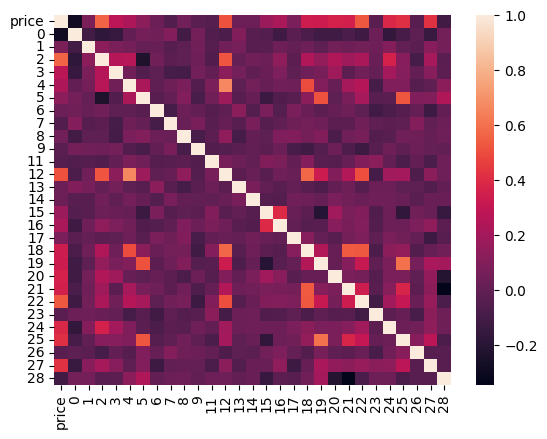

In [85]:
corr = df.corr()
display(sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values))

corr.style.background_gradient(cmap='coolwarm')# Обработка фич без указания алгоритма (Способ 1)

# Основной алгоритм отбора фичей

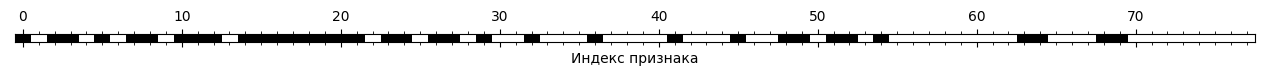

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, y, test_size=.2)

rfe_select = RFE(Lasso(),
             n_features_to_select=35)  # выбираем чуть больше (с запасом), мб, некоторые фичи могут попасть в барьер, допустим, 31-33

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [91]:
selected_columns = mask[:len(X.columns)]

print(selected_columns)

X_new = X.iloc[:,selected_columns].copy()
print(X_new.shape)

[ True False  True  True False  True False  True  True False  True  True
  True False  True  True  True  True  True  True  True  True False  True
  True False  True  True]
(408, 21)


In [95]:
scores = cross_val_score(Lasso(), X_new, y, cv=KFold(n_splits=5, shuffle=True), 
                         scoring='neg_mean_absolute_percentage_error')
display(scores)
display(np.mean(scores))
display(np.std(scores))

array([-0.1891723 , -0.18434429, -0.17087299, -0.1500649 , -0.17883739])

-0.17465837236916898

0.013719351947943981

# Подбор параметров Lasso

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

In [97]:
params = {
    'regressor__estimator': [Lasso()],
    'regressor__estimator__alpha': [0.01, 0.03, 0.05, 0.035],
}


model_pipe_with_transformed_Y = TransformedTargetRegressor(
    regressor = Pipeline([
        ('estimator', Lasso())
    ]),
    transformer=PowerTransformer(method='box-cox')
)

kfold = KFold(n_splits=5)

grid = GridSearchCV(model_pipe_with_transformed_Y, params, cv = kfold, scoring='neg_mean_absolute_percentage_error', n_jobs=-1, return_train_score = True)
grid.fit(X_train, y_train)
display(pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T)

,1,0,3,2
mean_fit_time,0.008173,0.008133,0.009169,0.008171
std_fit_time,0.000746,0.00042,0.001323,0.000976
mean_score_time,0.002193,0.002391,0.003207,0.002791
std_score_time,0.000398,0.000489,0.000765,0.000399
param_regressor__estimator,Lasso(),Lasso(),Lasso(),Lasso()
param_regressor__estimator__alpha,0.03,0.01,0.035,0.05
params,"{'regressor__estimator': Lasso(), 'regressor__...","{'regressor__estimator': Lasso(), 'regressor__...","{'regressor__estimator': Lasso(), 'regressor__...","{'regressor__estimator': Lasso(), 'regressor__..."
split0_test_score,-0.192375,-0.193089,-0.192544,-0.192832
split1_test_score,-0.18661,-0.18407,-0.187695,-0.190079
split2_test_score,-0.182141,-0.185624,-0.182399,-0.182896


In [98]:
pipe_Lasso = grid.best_estimator_
print(f"Cross val score: {np.mean(cross_val_score(pipe_Lasso, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True)))}")
print(f"std val score: {np.std(cross_val_score(pipe_Lasso, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True)))}")

Cross val score: -0.17167492451300298
std val score: 0.023011055544024682


# Подбор параметров GB

In [121]:
params ={
'regressor__estimator': [GradientBoostingRegressor(n_estimators=100)],
'regressor__estimator__learning_rate': [0.01, 0.1, 0.2],
'regressor__estimator__max_depth': [1, 2, 5],
'regressor__estimator__min_samples_split': [15, 18, 20, 25],
'regressor__estimator__min_samples_leaf': [2, 4, 6, 8],
'regressor__estimator__subsample': [0.1, 0.3, 0.5, 1]
}

model_pipe_with_transformed_Y = TransformedTargetRegressor(
    regressor = Pipeline([
        ('estimator', GradientBoostingRegressor())
    ]),
    transformer=PowerTransformer(method='box-cox')
)

kfold = KFold(n_splits=5)

grid = GridSearchCV(model_pipe_with_transformed_Y, params, cv = kfold, scoring='neg_mean_absolute_percentage_error', n_jobs=-1, return_train_score = True)
grid.fit(X_train, y_train)
display(pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T)

,289,193,258,281,306,205,269,277,290,314,...,27,31,35,39,43,47,51,55,59,63
mean_fit_time,0.147308,0.123184,0.19136,0.156477,0.171827,0.139334,0.141327,0.143719,0.187772,0.1794,...,0.139135,0.154284,0.160065,0.158869,0.154881,0.139732,0.143918,0.132753,0.135148,0.137738
std_fit_time,0.010889,0.01146,0.009455,0.015492,0.002051,0.006189,0.001595,0.005437,0.007657,0.005602,...,0.00421,0.012502,0.009614,0.020098,0.007934,0.003697,0.018057,0.006093,0.005144,0.002219
mean_score_time,0.003587,0.002792,0.003389,0.00319,0.003388,0.003986,0.003389,0.003589,0.003389,0.003389,...,0.002392,0.003389,0.002791,0.002592,0.002988,0.002792,0.00299,0.002791,0.002392,0.005581
std_score_time,0.000488,0.000399,0.000488,0.000399,0.000486,0.00063,0.000488,0.000797,0.000488,0.000488,...,0.000487,0.001016,0.000399,0.000488,0.000627,0.000399,0.000631,0.000399,0.000489,0.006196
param_regressor__estimator,GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),...,GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor(),GradientBoostingRegressor()
param_regressor__estimator__learning_rate,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
param_regressor__estimator__max_depth,2,1,2,2,2,1,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
param_regressor__estimator__min_samples_leaf,6,2,2,4,8,2,2,4,6,8,...,4,4,6,6,6,6,8,8,8,8
param_regressor__estimator__min_samples_split,15,15,15,20,15,25,25,18,15,20,...,20,25,15,18,20,25,15,18,20,25
param_regressor__estimator__subsample,0.3,0.3,0.5,0.3,0.5,0.3,0.3,0.3,0.5,0.5,...,1,1,1,1,1,1,1,1,1,1


In [100]:
pipe_GB = grid.best_estimator_
print(f"Cross val score: {np.mean(cross_val_score(pipe_GB, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True)))}")
print(f"std val score: {np.std(cross_val_score(pipe_GB, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True)))}")

Cross val score: -0.17948461806975838
std val score: 0.013066848784796175


# Подбор параметров SVR

In [101]:
model_pipe_with_transformed_Y = TransformedTargetRegressor(
    regressor = Pipeline([
        ('estimator', SVR())
    ]),
    transformer=PowerTransformer(method='box-cox')
)

cv = KFold(n_splits=5, shuffle=True)

# параметры решетки
param_grid = {'regressor__estimator__C': [0.3, 0.5, 0.7, 1, 1.1, 1.2, 1.3, 1.4]}


grid = GridSearchCV(model_pipe_with_transformed_Y, param_grid, cv=cv, scoring='neg_mean_absolute_percentage_error', refit='neg_mean_absolute_percentage_error', n_jobs=-1, return_train_score = True)
grid.fit(X_train, y_train)
display(pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T)

,1,2,0,3,4,5,6,7
mean_fit_time,0.01396,0.015148,0.013922,0.016346,0.015946,0.016145,0.016544,0.017541
std_fit_time,0.001982,0.000399,0.000612,0.000798,0.00063,0.000746,0.000796,0.000798
mean_score_time,0.005574,0.005583,0.005781,0.00598,0.006578,0.00618,0.006179,0.00598
std_score_time,0.000484,0.000487,0.000399,0.00063,0.000797,0.000399,0.000745,0.000001
param_regressor__estimator__C,0.5,0.7,0.3,1,1.1,1.2,1.3,1.4
params,{'regressor__estimator__C': 0.5},{'regressor__estimator__C': 0.7},{'regressor__estimator__C': 0.3},{'regressor__estimator__C': 1},{'regressor__estimator__C': 1.1},{'regressor__estimator__C': 1.2},{'regressor__estimator__C': 1.3},{'regressor__estimator__C': 1.4}
split0_test_score,-0.199265,-0.199829,-0.197641,-0.202344,-0.202969,-0.204136,-0.205345,-0.207069
split1_test_score,-0.219915,-0.216859,-0.224959,-0.215032,-0.215039,-0.214733,-0.214501,-0.214245
split2_test_score,-0.163006,-0.163883,-0.164259,-0.166595,-0.167619,-0.169009,-0.17049,-0.171659
split3_test_score,-0.170229,-0.168365,-0.171319,-0.169038,-0.169976,-0.171489,-0.173143,-0.174851


In [102]:
pipe_SVR = grid.best_estimator_
print(f"Cross val score: {np.mean(cross_val_score(pipe_SVR, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True)))}")
print(f"std val score: {np.std(cross_val_score(pipe_SVR, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True)))}")

Cross val score: -0.18064769578079998
std val score: 0.01781709846935665


# ВСе модели показывали крайне большой показатель std() (волотильности в результатах), поэтому было решено взять Voiting, дабы дать скору большую стабильность

# Voiting

In [110]:
eclf = VotingRegressor(
    estimators=[('lasso', pipe_Lasso), ('gnb', pipe_GB), ('SVR', pipe_SVR)])

for clf, label in zip([pipe_Lasso, pipe_GB, pipe_SVR, eclf], ['Lasso', 
                                                 'Gradient Boosting', 'SVR', 'Ensemble']):
    scores = cross_val_score(clf, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True))
    print("F1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1: -0.17 (+/- 0.02) [Lasso]
F1: -0.17 (+/- 0.03) [Gradient Boosting]
F1: -0.18 (+/- 0.01) [SVR]
F1: -0.17 (+/- 0.02) [Ensemble]


In [112]:
print(f"Cross val score: {np.mean(cross_val_score(eclf, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True)))}")
print(f"std val score: {np.std(cross_val_score(eclf, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True)))}")

Cross val score: -0.167700123668456
std val score: 0.006251775589590466


In [113]:
cross_val_score(eclf, X_new, y, scoring='neg_mean_absolute_percentage_error', cv=KFold(n_splits=5, shuffle=True))

array([-0.19534871, -0.16081911, -0.15426749, -0.15191633, -0.1769621 ])

# Best model

In [114]:
eclf

VotingRegressor(estimators=[('lasso',
                             TransformedTargetRegressor(regressor=Pipeline(steps=[('estimator',
                                                                                   Lasso(alpha=0.03))]),
                                                        transformer=PowerTransformer(method='box-cox'))),
                            ('gnb',
                             TransformedTargetRegressor(regressor=Pipeline(steps=[('estimator',
                                                                                   GradientBoostingRegressor(max_depth=1,
                                                                                                             min_samples_leaf=6,
                                                                                                             min_samples_split=15,
                                                                                                             subsample=0.5))]),
                                                        transformer=PowerTransformer(method='box-cox'))),
                            ('SVR',
                             TransformedTargetRegressor(regressor=Pipeline(steps=[('estimator',
                                                                                   SVR(C=0.5))]),
                                                        transformer=PowerTransformer(method='box-cox')))])

In [115]:
print(X_new.columns)

Index(['0', '2', '3', '5', '7', '8', '11', '12', '13', '15', '16', '17', '18',
       '19', '20', '21', '22', '24', '25', '27', '28'],
      dtype='object')


# Приложения:
 # Хотел посмотреть на коллинеарность под призмой VIF-test, но там особо ничего улучшить не удалось (единственное что, меня смущала только '12' фича, но там скор даже падал при ее дропе в cross_val да и + VIF-тест показал умереенное знаечние коэф-та при ней)

<AxesSubplot: >

,0,2,3,5,7,8,11,12,13,15,16,17,18,19,20,21,22,24,25,27,28
0,1.000000,-0.180131,-0.145444,0.056038,0.102345,-0.104896,-0.055793,-0.071993,0.095986,-0.045459,-0.120691,-0.025142,-0.072863,-0.116691,-0.114774,-0.080717,-0.119670,-0.162582,-0.090853,-0.140267,0.050581
2,-0.180131,1.000000,0.254300,-0.235658,-0.023237,-0.014880,-0.065532,0.517711,0.006567,0.026574,0.140172,-0.022291,0.234583,0.150639,0.243506,0.185434,0.226779,0.361520,0.115848,0.212184,-0.029247
3,-0.145444,0.254300,1.000000,-0.057441,-0.096265,-0.102720,-0.000822,0.131529,0.054573,0.018281,0.082354,-0.014943,0.035752,0.069576,0.187973,-0.023067,0.047384,0.203631,0.108000,0.114057,-0.020152
5,0.056038,-0.235658,-0.057441,1.000000,0.003780,0.098682,0.046662,0.180740,-0.036639,-0.139305,-0.065097,-0.039431,0.120914,0.514410,-0.018356,0.068937,0.209636,-0.029123,0.524844,0.099242,0.238718
7,0.102345,-0.023237,-0.096265,0.003780,1.000000,0.012919,-0.038496,0.008636,-0.034767,-0.043011,-0.009618,0.032762,0.049605,0.036307,-0.023944,-0.020476,0.042600,-0.022755,-0.009101,-0.006429,0.027712
8,-0.104896,-0.014880,-0.102720,0.098682,0.012919,1.000000,-0.022240,0.143710,-0.097227,-0.016133,0.090327,0.093592,0.057105,0.094490,-0.075168,0.048972,0.064534,-0.038000,0.040477,0.008505,0.036072
11,-0.055793,-0.065532,-0.000822,0.046662,-0.038496,-0.022240,1.000000,0.062841,0.025194,0.092612,0.079791,0.000811,0.106229,-0.035686,-0.042118,0.012514,0.091653,-0.002461,-0.076935,-0.079659,0.036385
12,-0.071993,0.517711,0.131529,0.180740,0.008636,0.143710,0.062841,1.000000,-0.023624,-0.036347,0.036052,0.014585,0.570961,0.329199,0.095319,0.244147,0.503989,0.194787,0.198566,0.120828,0.037535
13,0.095986,0.006567,0.054573,-0.036639,-0.034767,-0.097227,0.025194,-0.023624,1.000000,-0.004972,-0.034452,0.006694,-0.036537,-0.069875,0.000248,0.033459,-0.043050,0.023862,-0.014693,-0.059111,0.000023
15,-0.045459,0.026574,0.018281,-0.139305,-0.043011,-0.016133,0.092612,-0.036347,-0.004972,1.000000,0.391436,0.017632,-0.019771,-0.212887,0.193473,0.080633,0.094765,0.026092,-0.168475,0.014744,-0.145229


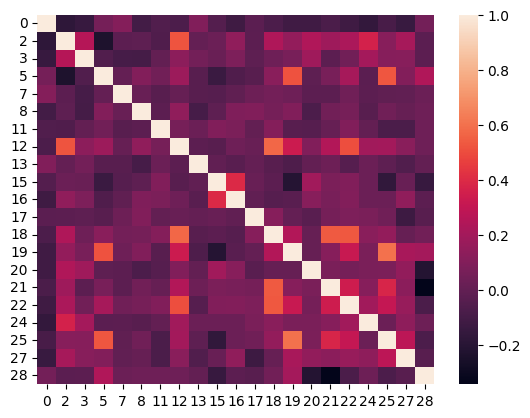

In [116]:
corr = X_new.corr()
display(sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values))

corr.style.background_gradient(cmap='coolwarm')

In [117]:
print('VIF tests (< 10)')
factors_sh = X_new
display(pd.Series([vif(factors_sh.values, i) for i in range(factors_sh.shape[1])], index=factors_sh.columns, name = 'Linear experience model'))

VIF tests (< 10)


0     1.146703
2     2.214448
3     1.181510
5     2.212322
7     1.034785
8     1.110716
11    1.071411
12    2.457165
13    1.040482
15    1.357794
16    1.288399
17    1.075578
18    2.685459
19    2.085720
20    1.212897
21    2.295691
22    1.785919
24    1.257665
25    2.603603
27    1.212994
28    1.529100
Name: Linear experience model, dtype: float64